<a href="https://colab.research.google.com/github/johnmatsson/32feet/blob/main/Kopia_av_Autoencoder_image_category_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Define the autoencoder model
input_img = Input(shape=(3072,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode some images
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)

# Display original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(20):
    # Original images
    ax = plt.subplot(2, 20, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, 20, i + 1 + 20)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

Epoch 1/10


ValueError: ignored

169001437/169001437 [==============================] - 3s 0us/step
Epoch 1/50
1563/1563 [==============================] - 11s 4ms/step - loss: 0.5807 - val_loss: 0.5539
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5580 - val_loss: 0.5470
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5535 - val_loss: 0.5449
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5516 - val_loss: 0.5433
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5508 - val_loss: 0.5434
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5503 - val_loss: 0.5422
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5500 - val_loss: 0.5422
Epoch 8/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5497 - val_loss: 0.5416
Epoch 9/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5496 - val_loss: 0.5414
Epoch 10/50
15

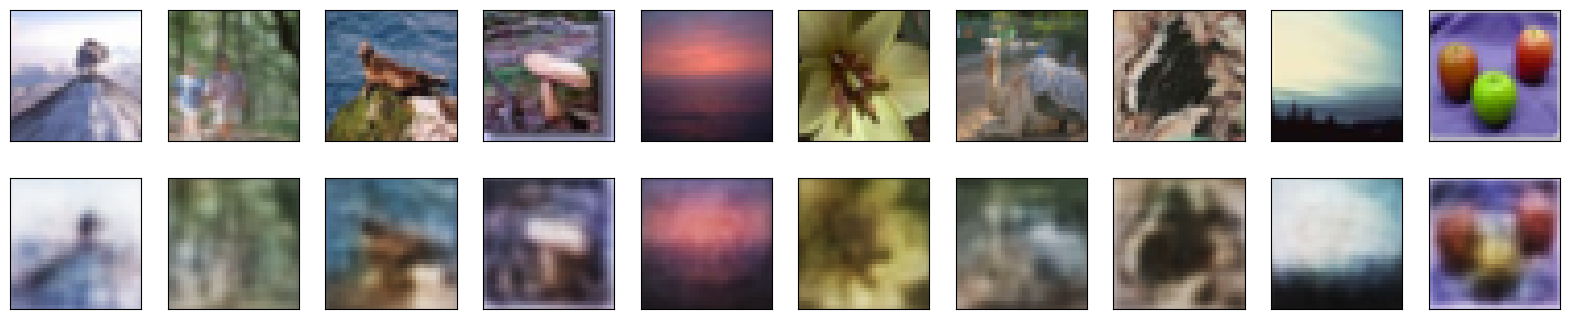

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers.experimental import preprocessing
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-100 dataset
(x_train, _), (x_test, _) = cifar100.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Normalize the data
normalizer = preprocessing.Normalization()
normalizer.adapt(x_train)

# Define the autoencoder model with dropout and normalized input
input_img = Input(shape=(3072,))
normalized_input = normalizer(input_img)

encoded = Dense(784, activation='relu')(normalized_input)
encoded = Dropout(0.3)(encoded)  # Adding dropout for regularization

decoded = Dense(3072, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

# Set a custom learning rate
custom_optimizer = Adam(learning_rate=0.0001)

autoencoder.compile(optimizer=custom_optimizer, loss='binary_crossentropy')

# Train the autoencoder
history = autoencoder.fit(x_train, x_train, epochs=50, batch_size=32, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode some images
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)

# Display original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))  # Adjusted for CIFAR-100 dimensions
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))  # Adjusted for CIFAR-100 dimensions
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()